# Feature selection - Correlation and P value


In [1]:
# run data wrangling notebook first.
%run ./unit_5_Data_Wrangling_WC.ipynb

./unit_5_Data_Wrangling_WC.ipynb:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  },


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

np.random.seed(123)

### Loading the dataset - Alameda
1. Limit dataframe to Alameda County.
2. Have total of 9 columns without Date and RegionName

In [3]:
data = master_df_master[master_df_master.RegionName=='Alameda County'].copy()

data.head()

,Date,RegionName,Population,Afford_idx,Property_Crimes,Violent_Crimes,SalePrice,UnemployRate,Rate,Days_On_Zillow,Monthly_List_Zillow
0,2013-01-01,Alameda County,1554138,0.32,1018333,151634,429100.0,8.3,3.41,79.0,2326.0
1,2013-02-01,Alameda County,1554138,0.32,1018333,151634,428400.0,7.8,3.53,70.0,2229.0
2,2013-03-01,Alameda County,1554138,0.32,1018333,151634,436100.0,7.5,3.57,51.0,2115.0
3,2013-04-01,Alameda County,1554138,0.25,1018333,151634,441500.0,7.0,3.45,46.5,2105.0
4,2013-05-01,Alameda County,1554138,0.25,1018333,151634,460100.0,7.0,3.54,45.0,2159.0


Removing the RegionName and Date

In [4]:
data = data.iloc[:,2:]

In [5]:
data.head()

,Population,Afford_idx,Property_Crimes,Violent_Crimes,SalePrice,UnemployRate,Rate,Days_On_Zillow,Monthly_List_Zillow
0,1554138,0.32,1018333,151634,429100.0,8.3,3.41,79.0,2326.0
1,1554138,0.32,1018333,151634,428400.0,7.8,3.53,70.0,2229.0
2,1554138,0.32,1018333,151634,436100.0,7.5,3.57,51.0,2115.0
3,1554138,0.25,1018333,151634,441500.0,7.0,3.45,46.5,2105.0
4,1554138,0.25,1018333,151634,460100.0,7.0,3.54,45.0,2159.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 60
Data columns (total 9 columns):
Population             61 non-null int64
Afford_idx             61 non-null float64
Property_Crimes        61 non-null int64
Violent_Crimes         61 non-null int64
SalePrice              61 non-null float64
UnemployRate           61 non-null float64
Rate                   61 non-null float64
Days_On_Zillow         61 non-null float64
Monthly_List_Zillow    61 non-null float64
dtypes: float64(6), int64(3)
memory usage: 4.8 KB


<a id="3-2"></a>
## Selecting features based on correlation
Generating the correlation matrix

In [7]:
corr = data.corr()
corr.head()

,Population,Afford_idx,Property_Crimes,Violent_Crimes,SalePrice,UnemployRate,Rate,Days_On_Zillow,Monthly_List_Zillow
Population,1.000000,-0.415892,-0.055347,0.908569,0.968012,-0.935076,-0.183143,-0.252730,-0.462145
Afford_idx,-0.415892,1.000000,0.386625,-0.198944,-0.465295,0.489153,-0.458531,0.607849,0.160462
Property_Crimes,-0.055347,0.386625,1.000000,0.175542,-0.114926,0.105521,-0.372086,0.114445,0.054861
Violent_Crimes,0.908569,-0.198944,0.175542,1.000000,0.918206,-0.880449,-0.352333,-0.205527,-0.544436
SalePrice,0.968012,-0.465295,-0.114926,0.918206,1.000000,-0.959253,-0.109471,-0.317180,-0.556541


Generating the correlation heatmap

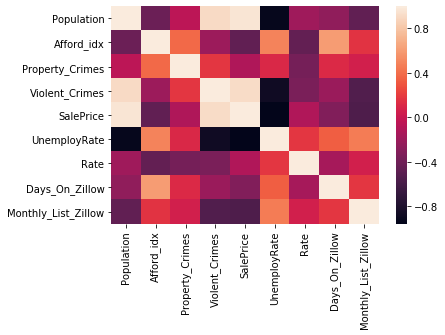

In [8]:
sns.heatmap(corr)

Next, we compare the correlation between features and remove one of two features that have a correlation higher than 0.9

In [9]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

In [10]:
selected_columns = data.columns[columns]



Above, we can see that only 7 columns selected. Adding SalesPrice column (what we want to predict) were selected.

In [11]:
data2 = data.copy()
data2 = data2[selected_columns] 

print(selected_columns)

# add sales price to data2
data2['SalePrice'] = data['SalePrice']

Index(['Population', 'Afford_idx', 'Property_Crimes', 'UnemployRate', 'Rate',
       'Days_On_Zillow', 'Monthly_List_Zillow'],
      dtype='object')


In [12]:
data2.head()

,Population,Afford_idx,Property_Crimes,UnemployRate,Rate,Days_On_Zillow,Monthly_List_Zillow,SalePrice
0,1554138,0.32,1018333,8.3,3.41,79.0,2326.0,429100.0
1,1554138,0.32,1018333,7.8,3.53,70.0,2229.0,428400.0
2,1554138,0.32,1018333,7.5,3.57,51.0,2115.0,436100.0
3,1554138,0.25,1018333,7.0,3.45,46.5,2105.0,441500.0
4,1554138,0.25,1018333,7.0,3.54,45.0,2159.0,460100.0


Now, the dataset has only those columns with correlation less than 0.9

<a id="3-3"></a>
## Selecting columns based on p-value
Next we will be selecting the columns based on how they affect the p-value. 
Note: selected columns do not include "SalePrice" column which is the data we want to predict.

In [13]:
import statsmodels.formula.api as sm

In [14]:
def create_ols_string(columns, f_predict):  
    num_cols = columns.size
    ols_string=f_predict+'~'
    for i in range(0, num_cols):
        if (columns.values[i] != f_predict):
            ols_string = ols_string+columns.values[i]+'+'
    return ols_string[0:-1]
 

def backwardElimination(data_df, sl, columns, f_predict):
    numVars = data_df.columns.size
    print('numVars ' + str(numVars))
    for i in range(0, numVars):
        print('i' + str(i))

        ols_string = create_ols_string(columns, f_predict)
        print(ols_string)
        regressor_OLS = sm.ols(ols_string, data=data_df).fit()
        
        maxVar = max(regressor_OLS.pvalues)
        print('maxVar ' + str(maxVar))
        if maxVar > sl:
            for j in range(0, numVars - i):
                print('j' + str(j))
                if (regressor_OLS.pvalues[j] == maxVar):
                    print('in if block')
                    print(data_df.columns.size)
                    data_df.drop(data_df.columns[j], axis=1, inplace=True)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary() 
    
    return data_df, columns

In [15]:
SL = 0.05

import statsmodels.formula.api as sm 
df = data2 

In [16]:


#data_modeled = sm.ols('SalePrice~Population+Afford_idx+Property_Crimes+UnemployRate+Rate+Days_On_Zillow+Monthly_List_Zillow', data=df).fit()
#data_modeled.summary()
#maxVar = max(data_modeled.pvalues) 

        
data_modeled, selected_columns = backwardElimination(df, SL, selected_columns, 'SalePrice')

numVars 8
i0
SalePrice~Population+Afford_idx+Property_Crimes+UnemployRate+Rate+Days_On_Zillow+Monthly_List_Zillow
maxVar 0.3868073490414282
j0
j1
j2
j3
in if block
8
j4
j5
j6
j7
i1
SalePrice~Population+Afford_idx+Property_Crimes+Rate+Days_On_Zillow+Monthly_List_Zillow
maxVar 0.8113488003213623
j0
j1
j2
in if block
7
j3
j4
j5
j6
i2
SalePrice~Population+Afford_idx+Rate+Days_On_Zillow+Monthly_List_Zillow
maxVar 0.5775604785184019
j0
j1
j2
in if block
6
j3
j4
j5
i3
SalePrice~Population+Afford_idx+Days_On_Zillow+Monthly_List_Zillow
maxVar 0.276576308413528
j0
j1
j2
j3
in if block
5
j4
i4
SalePrice~Population+Afford_idx+Days_On_Zillow
maxVar 0.3156001056156018
j0
j1
j2
in if block
4
j3
i5
SalePrice~Population+Afford_idx
maxVar 0.033580735922866776
i6
SalePrice~Population+Afford_idx
maxVar 0.033580735922866776
i7
SalePrice~Population+Afford_idx
maxVar 0.033580735922866776


Moving the result to a new dataframe

In [17]:
result = pd.DataFrame()

result['SalePrice'] = data.iloc[:,0]
result.head()

,SalePrice
0,1554138
1,1554138
2,1554138
3,1554138
4,1554138


Creating a dataframe with the columns selected using the p-value and correlation

In [28]:
data = pd.DataFrame(data = data_modeled, columns = selected_columns)

data.head()

,Population,Afford_idx
0,1554138,0.32
1,1554138,0.32
2,1554138,0.32
3,1554138,0.25
4,1554138,0.25



## ??Visualizing the selected features
Plotting the data to visualize their distribution

No handles with labels found to put in legend.
No handles with labels found to put in legend.


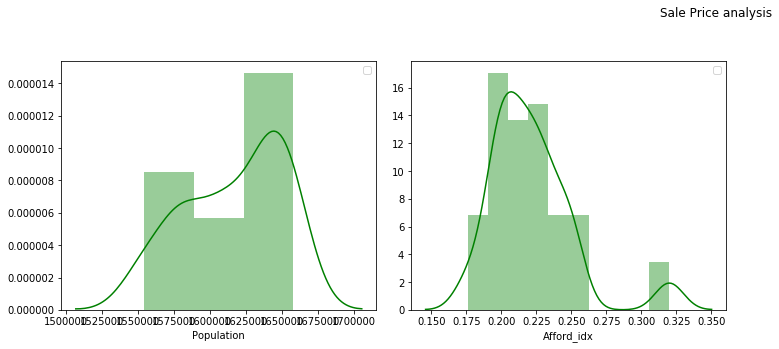

In [27]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in data.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(data[i], color='g')
    #sns.distplot(data[i][result['SalePrice']==0], color='g', label = 'SalePrice')
    plt.legend(loc='best')
fig.suptitle('Sale Price analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

Now we split the data to train and test set. 20% of the data is used to create the test data and 80% to create the train data

In [20]:
x_train, x_test, y_train, y_test = train_test_split(data.values, result.values, test_size = 0.2)

<a id="3-5"></a>
## ??Building a model with the selected features
We are using a [Support Vector Classifier](https://en.wikipedia.org/wiki/Support_vector_machine) with a [Gaussian Kernel](https://en.wikipedia.org/wiki/Gaussian_function) to make the predictions. We will train the model on our train data and calculate the accuracy of the model using the test data

In [21]:
svc = SVC()              # The default kernel used by SVC is the gaussian kernel
svc.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Making the predictions and calculating the accuracy

In [22]:
prediction = svc.predict(x_test)

We are using a [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) here

In [23]:
cm = confusion_matrix(y_test, prediction)
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/x_test.shape[0]
print(accuracy)

1.0


<a id="3-6"></a>
## ??Building a model without feature selection and comparing the results
Next, we repeat all the above steps except feature selection, which are:
* Loading the data
* Removing the unwanted columns
* Encoding the categorical variable
* Splitting the data into train and test set
* Fitting the data to the model
* Making the predictions and calculating the accuracy

In [24]:
data = pd.read_csv('../input/data.csv')          
result = pd.DataFrame()
result['diagnosis'] = data.iloc[:,1]
data = data.iloc[:,2:-1]                         
label_encoder = LabelEncoder()              
data.iloc[:,0] = label_encoder.fit_transform(data.iloc[:,0]).astype('float64')    
x_train, x_test, y_train, y_test = train_test_split(data.values, result.values, test_size = 0.2)      
svc = SVC()
svc.fit(x_train, y_train)                        
prediction = svc.predict(x_test)                 
cm = confusion_matrix(y_test, prediction)        
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/x_test.shape[0]                
print(accuracy)

FileNotFoundError: [Errno 2] File b'../input/data.csv' does not exist: b'../input/data.csv'

Here we can see that the accuracy of the predictions is better when proper feature selection is performed